# Importing Data

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets

df =  X.join(y)


#Data understanding

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
## drop oldpeak(slope), thalach(slope), exang(cp), restecg(slope)
df.drop(['oldpeak', 'thalach', 'exang', 'restecg', "fbs", "slope", "thal", "ca"], axis=1, inplace=True)


In [5]:
numerical_cols = ["age", "trestbps", "chol"]
categorical_cols = ["sex", "cp"]


In [6]:
# remove null values
df.dropna(inplace=True)

# Handle Outliers

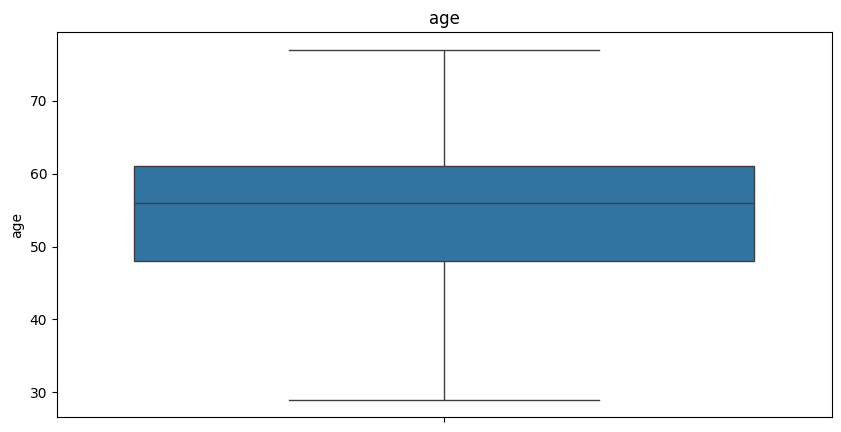

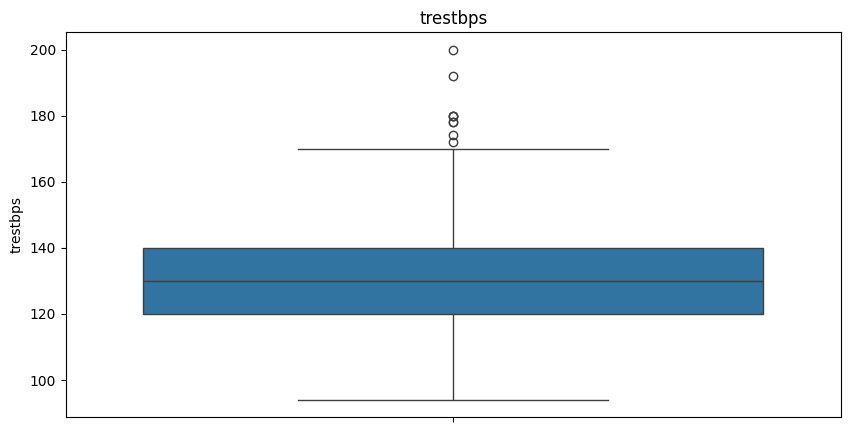

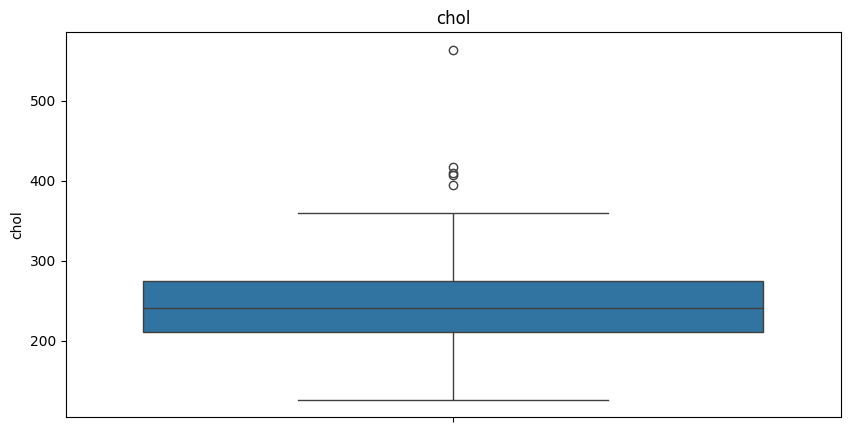

In [7]:
for col in numerical_cols:
  plt.figure(figsize=(10, 5))
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()


In [8]:
for col in ["trestbps", "chol"]:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


# Plotting

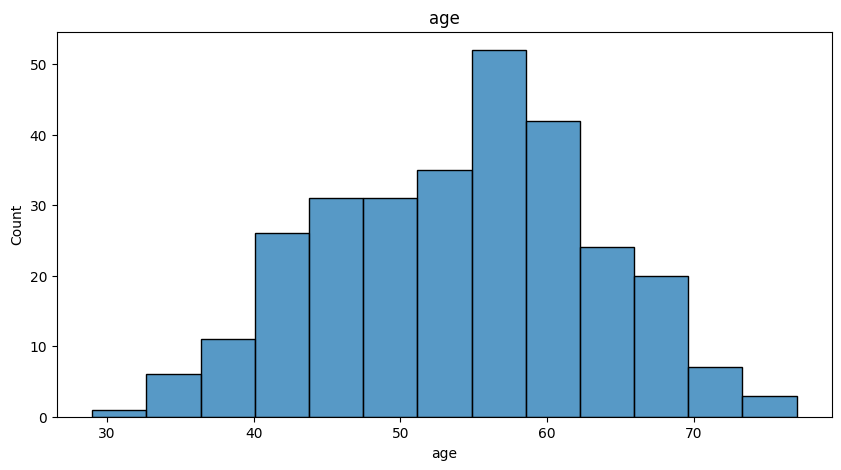

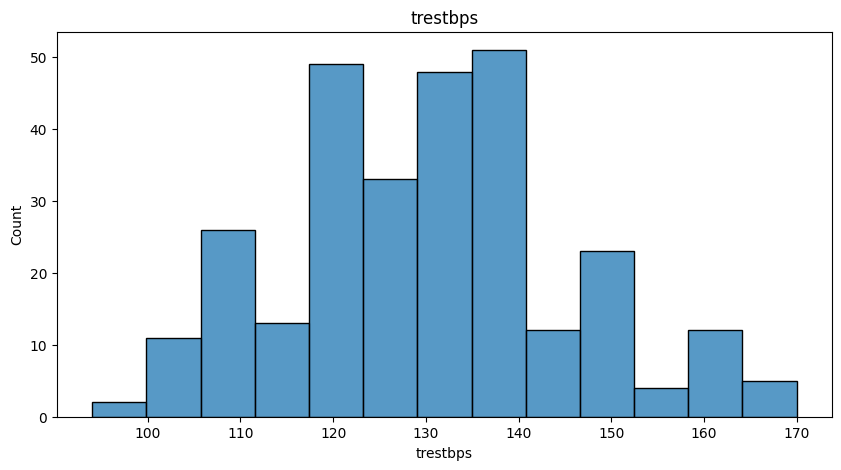

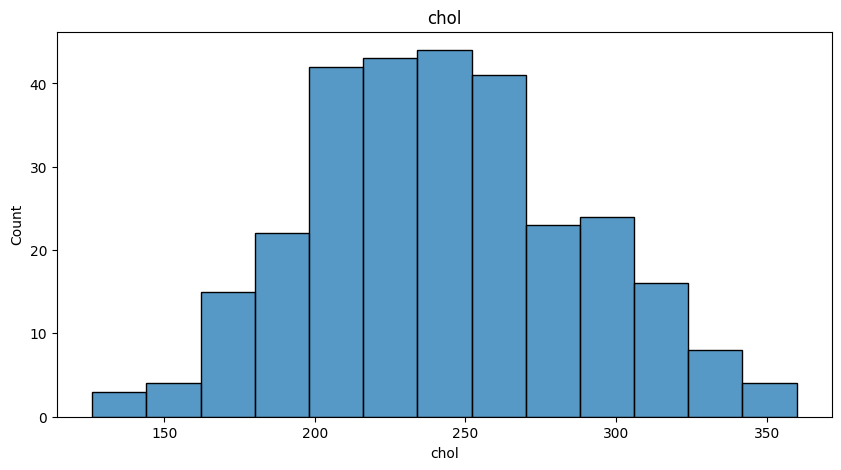

In [9]:
for col in numerical_cols:
  plt.figure(figsize=(10, 5))
  sns.histplot(df[col])
  plt.title(col)
  plt.show()


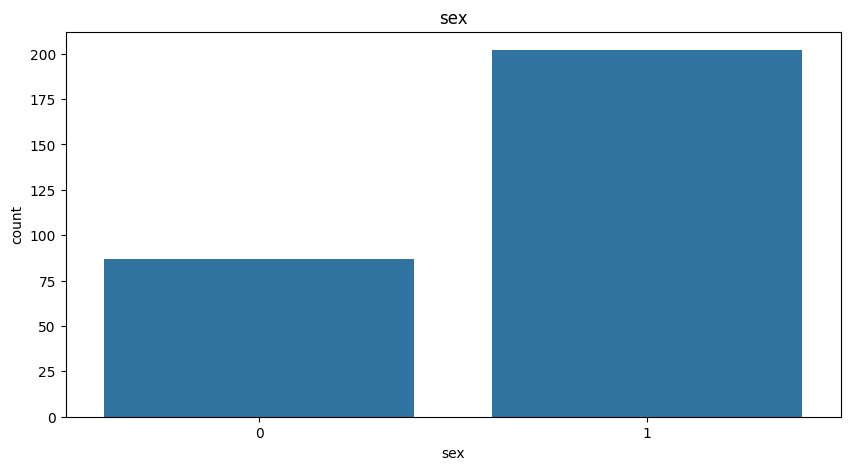

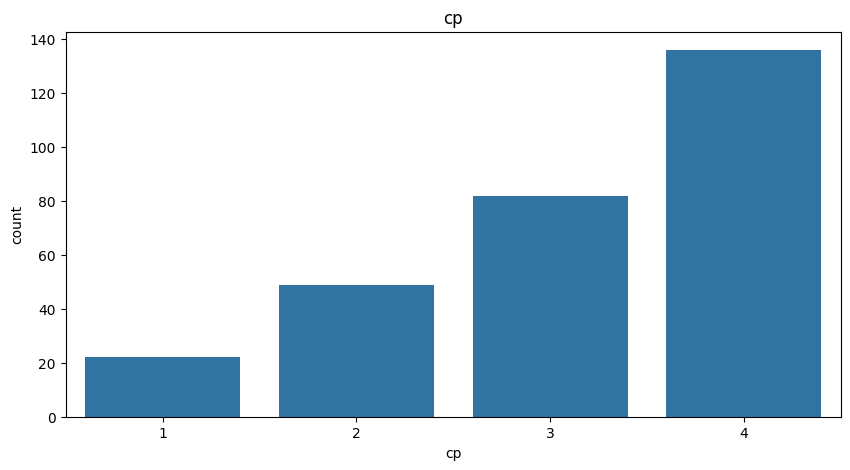

In [10]:
for col in categorical_cols:
  plt.figure(figsize=(10, 5))
  sns.barplot(df[col].value_counts())
  plt.title(col)
  plt.show()


<Axes: >

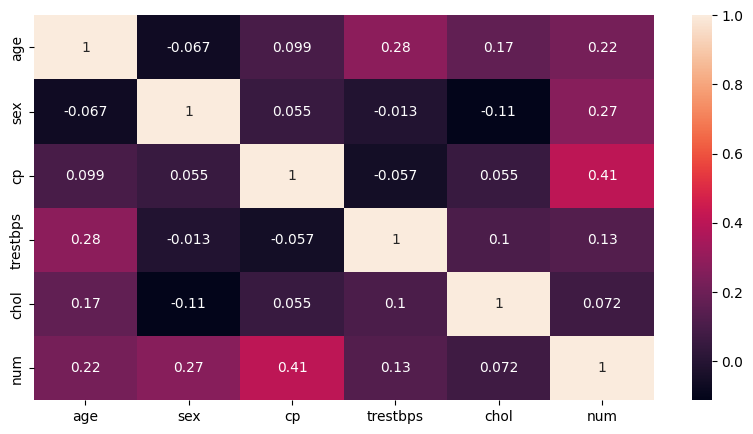

In [11]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True)


# Scaling

In [12]:
df_scaled = df.copy()
# get features of df_scaled and assign it to variable
X_scaled = df_scaled.iloc[:, :-1]
y_scaled = df_scaled.iloc[:, -1]

# solving imbalance data
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=42)
X_scaled, y_scaled = sm.fit_resample(X_scaled, y_scaled)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_scaled)




In [13]:
y_scaled

,num
0,0
1,2
2,1
3,0
4,0
...,...
430,4
431,4
432,4
433,4


In [14]:
# convert bool array to 1 and 0
# y = y.astype(int)
# pd.DataFrame(y).value_counts()

# Encoding

In [15]:
# One-hot encode the target column
y_one_hot = pd.get_dummies(y_scaled)
y_encoded = y_one_hot.values


In [16]:
y_encoded.shape

(435, 5)

# Splitting Data

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify = y_encoded)


# Model Architecture

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer


In [19]:
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [20]:
## model compilation
model.compile(loss='CategoricalCrossentropy', optimizer='adam', metrics=['accuracy', "precision", "recall"]) # f1-score not applicaple as it used for binary classification


In [21]:
y_train.shape

(348, 5)

In [22]:
## fit the model
history = model.fit(X_train, y_train, epochs=20, batch_size=10)


Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.2591 - loss: 1.5861 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5008 - loss: 1.4734 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4587 - loss: 1.4366 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4325 - loss: 1.4227 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4437 - loss: 1.3721 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4897 - loss: 1.3713 - precision: 0.3889 - recall: 0.0025
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4718 - loss: 1.4122 - precision: 0.9140 - recall: 0.0283
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5075 - loss: 1.3992 - precision: 0.7923 - recall

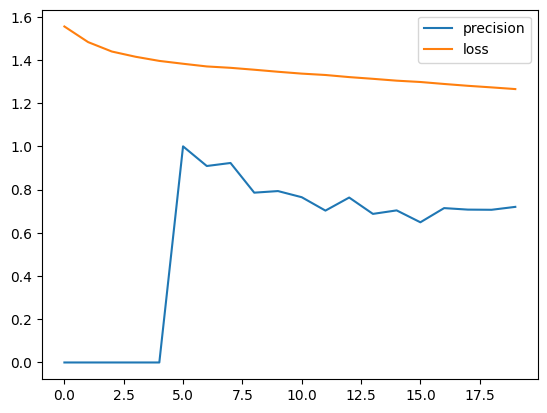

In [23]:
# plotting accuracy/loss over epochs
plt.plot(history.history['precision'])
plt.plot(history.history['loss'])
# add legend for plot
plt.legend(['precision', 'loss'])
plt.show()

In [24]:
## model evaluation
model.evaluate(X_test, y_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 315ms/step - accuracy: 0.5668 - loss: 1.2658 - precision: 0.6595 - recall: 0.1586


[1.262894630432129, 0.5632184147834778, 0.699999988079071, 0.16091954708099365]

In [25]:

# plotting the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[22,  0,  0,  0,  9],
       [ 5,  0,  0,  0,  6],
       [ 2,  0,  0,  0,  5],
       [ 2,  0,  0,  0,  4],
       [ 5,  0,  0,  0, 27]])

# Hypertuning

In [26]:
# hypertuning for number of layers, neurons, learning rate, epochs and batch size
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [27]:
params = {
    'layers': [2, 10, 30, 50],
    'neurons': [10, 30, 50, 100],
    'learning_rate': [0.001, 0.01, 0.1],
    'epochs': [10, 50, 100],
    'batch_size': [5, 10, 20, 50]
}

In [28]:
#Create a model function
def create_model(layers=1, neurons=10, learning_rate=0.01):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)))
    for _ in range(layers):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer for multi-class classification
    model.compile(optimizer="adam",
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [29]:
!pip install scikit_learn
!pip install scikeras[tensorflow-cpu]  # cpu

In [30]:

#Wrap the model with KerasClassifier
from scikeras.wrappers import KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0, layers=1, learning_rate=0.01, neurons=10)

In [31]:
# #Perform Gridsearch
# from sklearn.model_selection import GridSearchCV
# grid = GridSearchCV(estimator=model, param_grid=params, cv=3, error_score='raise')
# grid_result = grid.fit(X_train, y_train)


# #Print the best hyperparameters
# print("Best Hyperparameters:", grid_result.best_params_)
# print("Best Score:", grid_result.best_score_)

#Perform random search
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=params, cv=3, n_iter=5)
random_search_result = random_search.fit(X_train, y_train)

#Print the best hyperparameters
print("Best Hyperparameters:", random_search_result.best_params_)
print("Best Score:", random_search_result.best_score_)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using 

Best Hyperparameters: {'neurons': 50, 'learning_rate': 0.1, 'layers': 30, 'epochs': 50, 'batch_size': 20}
Best Score: 0.5459770114942529


In [32]:
### fitting model after hypertuning

# fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10)

# plotting accuracy/loss over epochs
plt.plot(history.history['precision'])
plt.plot(history.history['loss'])
# add legend for plot
plt.legend(['precision', 'loss'])
plt.show()

## model evaluation
model.evaluate(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


AttributeError: 'KerasClassifier' object has no attribute 'history'

# Machine Learning Algorithm

In [ ]:
X_train_ML, X_test_ML, y_train_ML, y_test_ML = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42, stratify = y_scaled)


In [ ]:
# using algorithm of logistic algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
lr = LogisticRegression()
lr.fit(X_train_ML, y_train_ML)
y_pred = lr.predict(X_test_ML)
print("Accuracy:", accuracy_score(y_test_ML, y_pred))

In [ ]:
# using algorithm of SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_ML, y_train_ML)
y_pred = svc.predict(X_test_ML)
print("Accuracy:", accuracy_score(y_test_ML, y_pred))

In [ ]:
# using algorithm of navie bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_ML, y_train_ML)
y_pred = nb.predict(X_test_ML)
print("Accuracy:", accuracy_score(y_test_ML, y_pred))

In [ ]:

# using algorithm of Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_ML, y_train_ML)
y_pred = dt.predict(X_test_ML)
print("Accuracy:", accuracy_score(y_test_ML, y_pred))


In [ ]:
# using algorithm of Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_ML, y_train_ML)
y_pred = rf.predict(X_test_ML)
print("Accuracy:", accuracy_score(y_test_ML, y_pred))

# Feature Engineering with SHAP

In [ ]:
df_scaled.head()

In [ ]:
# import shap

# # Use the DeepExplainer
# explainer = shap.DeepExplainer(model, X_train[:100])  # Use training data for background
# shap_values = explainer.shap_values(X_train[:10])

# # Plot the SHAP values
# shap.summary_plot(shap_values, X_train[:10], feature_names=X.columns)

In [ ]:
# # Summary plot
# shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# # Force plot for a single prediction
# shap.initjs()
# shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])

# Feature Engineering with LIME

In [ ]:
# feature engineering with LIME
!pip install lime

In [ ]:
# # use lime
# import lime
# import lime.lime_tabular


# # Create an explainer object
# explainer = lime.lime_tabular.LimeTabularExplainer(
#     training_data=X_train,
#     feature_names=X.columns,
#     class_names=['0', '1', '2', '3'],
#     mode='classification'
# )



In [ ]:
# instance = pd.DataFrame(X_test).iloc[0]  # Select the first instance
# model.fit(X_train, y_train)
# exp = explainer.explain_instance(instance.values, model.predict_proba, num_features=5)
# exp.show_in_notebook(show_table=True)